<a href="https://colab.research.google.com/github/ersdanforth/UPenn_Social-Policy-and-Data-Analytics/blob/main/BikeProfits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import matplotlib
import csv

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MSSP-607/Assignments/Assignment2/Internet Sales.csv')

print(df)

       Unnamed: 0  CustomerKey  GeographyKey              City  \
0               0        11000            26       Rockhampton   
1               1        11000            26       Rockhampton   
2               2        11000            26       Rockhampton   
3               3        11000            26       Rockhampton   
4               4        11000            26       Rockhampton   
...           ...          ...           ...               ...   
60393       60393        29480           248            London   
60394       60394        29480           248            London   
60395       60395        29481           120               Hof   
60396       60396        29482           179        Saint Ouen   
60397       60397        29483           217  Paris La Defense   

      CountryRegionCode EnglishCountryRegionName CustomerAlternateKey Title  \
0                    AU                Australia           AW00011000   NaN   
1                    AU                Australia 

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#df.describe()
df.dtypes

0               object
3                int64
1                int64
1.1              int64
24.49          float64
24.49.1        float64
0.0            float64
0.0.1          float64
9.1593         float64
9.1593.1       float64
24.49.2        float64
1.9592         float64
0.6123         float64
Unnamed: 13    float64
Unnamed: 14    float64
2013-09-16      object
2013-09-28      object
2013-09-23      object
dtype: object

In [4]:
df['EnglishCountryRegionName'].unique()
#df['CurrencyKey'].unique()

array(['Australia', 'United States', 'Canada', 'Germany',
       'United Kingdom', 'France'], dtype=object)

In [5]:
#total orders by country
order = df.groupby('CountryRegionCode')['OrderQuantity'].sum()
order

#average unit price by country
price = df.groupby('CountryRegionCode')['UnitPrice'].mean()
price

#total sales by country
sales = df.groupby('CountryRegionCode')['SalesAmount'].sum()
sales

CountryRegionCode
AU    9.061001e+06
CA    1.977845e+06
DE    2.894312e+06
FR    2.644018e+06
GB    3.391712e+06
US    9.389790e+06
Name: SalesAmount, dtype: float64

In [6]:
df['Profit'] = df['SalesAmount'] - df['TotalProductCost']
df.loc[:, ['SalesAmount', 'TotalProductCost', 'Profit']].head()

,SalesAmount,TotalProductCost,Profit
0,3399.99,1912.1544,1487.8356
1,2319.99,1265.6195,1054.3705
2,21.98,8.2205,13.7595
3,2384.07,1481.9379,902.1321
4,28.99,10.8423,18.1477


In [7]:
#determine total profit per year by country
df.loc[:,'OrderDate'] = pd.to_datetime(df.OrderDate)

tab = pd.crosstab(
    index=df['CountryRegionCode'],
    columns=df['OrderDate'].dt.year,
    values=df['Profit'],
    aggfunc='sum'
)
tab

OrderDate,2010,2011,2012,2013,2014
CountryRegionCode,,,,,
AU,8673.4942,1.038517e+06,892026.6370,1.742026e+06,4611.2212
CA,1406.9758,2.277042e+05,126630.0303,4.687777e+05,5402.6372
DE,NaN,2.095144e+05,248027.1704,7.279400e+05,1889.2085
FR,1487.8356,1.647291e+05,265460.2912,6.527667e+05,1820.7855
GB,285.9519,2.220035e+05,291864.2965,8.743176e+05,2019.5010
US,5994.7149,9.815954e+05,603998.6005,2.299583e+06,9809.5842


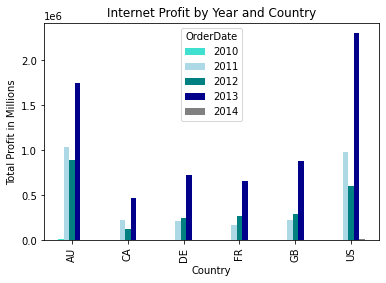

In [8]:
tab.plot.bar(color=['turquoise', 'lightblue', 'teal', 'darkblue', 'gray'])
plt.xlabel("Country")
plt.ylabel("Total Profit in Millions")
plt.title("Internet Profit by Year and Country")
plt.savefig('/content/drive/MyDrive/Colab Notebooks/MSSP-607/Assignments/Assignment2/YearlySalesCountry.pdf')

In [9]:
#association between home ownership and number of sales
df['HouseOwnerFlag'].unique()

tab = pd.crosstab(
    index=df['CountryRegionCode'],
    columns=df['HouseOwnerFlag'],
    values=df['OrderQuantity'],
    aggfunc=sum
)
tab

df.groupby('HouseOwnerFlag')['OrderQuantity'].sum()

HouseOwnerFlag
0    18699
1    41699
Name: OrderQuantity, dtype: int64

In [10]:
#association between marital status and number of sales
tab = pd.crosstab(
    index=df['CountryRegionCode'],
    columns=df['MaritalStatus'],
    values=df['OrderQuantity'],
    aggfunc=sum
)
tab

df.groupby('MaritalStatus')['OrderQuantity'].sum()

MaritalStatus
M    33273
S    27125
Name: OrderQuantity, dtype: int64

In [11]:
#association between gender and number of sales
tab = pd.crosstab(
    index=df['CountryRegionCode'],
    columns=df['Gender'],
    values=df['OrderQuantity'],
    aggfunc=sum
)
tab

gen = df.groupby('Gender')['OrderQuantity'].sum()
gen

Gender
F    30017
M    30381
Name: OrderQuantity, dtype: int64

In [12]:
#% female vs. male
f = 30017/(30017+30381)
m = 1-f
print(f, m)

0.4969866551872579 0.5030133448127421


In [13]:
#% married vs. single
si = 27125/(27125+33273)
ma = 1-si
print(si, ma)

0.4491042749759926 0.5508957250240074


In [14]:
#% house or no
ho = 41699/(41699+18699)
no = 1-ho
print(ho, no)

0.6904036557501904 0.30959634424980964


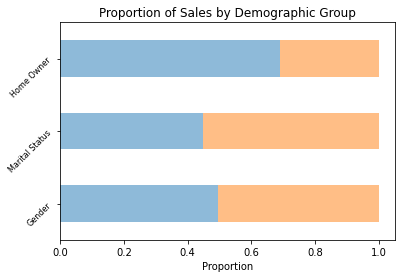

In [15]:
#visualizing proportions of sales by demographic group
d = {'a': [.4968,.4491,.6904], 'b': [.5030,.5509,.3096]}

df2 = pd.DataFrame(data=d)
ax1 = df2.plot.barh(legend=None, stacked=True, alpha=0.5)

labels = ['Gender', 'Marital Status', 'Home Owner']
ax1.set_yticklabels(labels, minor=False, rotation=45, size=8) 

plt.xlabel("Proportion")
plt.title("Proportion of Sales by Demographic Group")

plt.savefig('/content/drive/MyDrive/Colab Notebooks/MSSP-607/Assignments/Assignment2/Demos.pdf')
plt.show()

In [16]:
#summary statistics for yearly income by gender and country
df.groupby('CountryRegionCode')['YearlyIncome'].describe()

,count,mean,std,min,25%,50%,75%,max
CountryRegionCode,,,,,,,,
AU,13345.0,66238.291495,31604.953236,10000.0,40000.0,70000.0,90000.0,170000.0
CA,7620.0,60115.485564,21246.428705,10000.0,40000.0,60000.0,70000.0,170000.0
DE,5625.0,47511.111111,37560.182991,10000.0,20000.0,30000.0,60000.0,130000.0
FR,5558.0,39586.182080,28542.194530,10000.0,20000.0,30000.0,40000.0,110000.0
GB,6906.0,56139.588763,51043.678583,10000.0,20000.0,30000.0,80000.0,170000.0
US,21344.0,65108.227136,26015.747104,10000.0,50000.0,60000.0,70000.0,170000.0


In [17]:
#product names
df['EnglishProductName'].sort_values().unique()
#len(df['EnglishProductName'].unique())

array(['AWC Logo Cap', 'All-Purpose Bike Stand', 'Bike Wash - Dissolver',
       'Classic Vest, L', 'Classic Vest, M', 'Classic Vest, S',
       'Fender Set - Mountain', 'HL Mountain Tire', 'HL Road Tire',
       'Half-Finger Gloves, L', 'Half-Finger Gloves, M',
       'Half-Finger Gloves, S', 'Hitch Rack - 4-Bike',
       'Hydration Pack - 70 oz.', 'LL Mountain Tire', 'LL Road Tire',
       'Long-Sleeve Logo Jersey, L', 'Long-Sleeve Logo Jersey, M',
       'Long-Sleeve Logo Jersey, S', 'Long-Sleeve Logo Jersey, XL',
       'ML Mountain Tire', 'ML Road Tire', 'Mountain Bottle Cage',
       'Mountain Tire Tube', 'Mountain-100 Black, 38',
       'Mountain-100 Black, 42', 'Mountain-100 Black, 44',
       'Mountain-100 Black, 48', 'Mountain-100 Silver, 38',
       'Mountain-100 Silver, 42', 'Mountain-100 Silver, 44',
       'Mountain-100 Silver, 48', 'Mountain-200 Black, 38',
       'Mountain-200 Black, 42', 'Mountain-200 Black, 46',
       'Mountain-200 Silver, 38', 'Mountain-200 Silver, 

In [18]:
#product with the most total sales 
sales = df.groupby('EnglishProductName')['SalesAmount'].agg(['sum', 'mean']).sort_values(by = ['sum'], ascending=False).head(10)
sales

#sales.nlargest(25, 'sum')

,sum,mean
EnglishProductName,,
"Mountain-200 Black, 46",1.373470e+06,2215.273465
"Mountain-200 Black, 42",1.363142e+06,2220.101129
"Mountain-200 Silver, 38",1.339463e+06,2247.420789
"Mountain-200 Silver, 46",1.301100e+06,2243.276032
"Mountain-200 Black, 38",1.294866e+06,2224.855913
"Mountain-200 Silver, 42",1.257435e+06,2245.418880
"Road-150 Red, 48",1.205877e+06,3578.270000
"Road-150 Red, 62",1.202299e+06,3578.270000
"Road-150 Red, 52",1.080638e+06,3578.270000


In [19]:
#create bike category
df['Bike'] = df.EnglishProductName.str.contains(r'|'.join([
    'Mountain-', 'Road-', 'Touring-' 
]))
df[['EnglishProductName','Bike']].head()

,EnglishProductName,Bike
0,"Mountain-100 Silver, 38",True
1,"Mountain-200 Silver, 38",True
2,Fender Set - Mountain,False
3,"Touring-1000 Blue, 46",True
4,Touring Tire,False


In [20]:
#comparing order quantities, sales amount, and profits for bikes and other items
quant = df.groupby('Bike')['OrderQuantity'].agg(['sum', 'mean'])
quant
sales = df.groupby('Bike')['SalesAmount'].agg(['sum', 'mean'])
sales
profit = df.groupby('Bike')['Profit'].agg(['sum', 'mean'])
profit

,sum,mean
Bike,,
False,5.750871e+05,12.725138
True,1.150580e+07,756.711378


In [21]:
#comparing profit and order quantities across countries
prof = df.groupby('CountryRegionCode')['Profit'].sum()
prof
quant = df.groupby('CountryRegionCode')['OrderQuantity'].sum()
quant

CountryRegionCode
AU    13345
CA     7620
DE     5625
FR     5558
GB     6906
US    21344
Name: OrderQuantity, dtype: int64

In [22]:
#comparing order quantities for bikes and non-bikes across countries
quant = pd.crosstab(
    index=df['CountryRegionCode'],
    columns=df['Bike'],
    values=df['OrderQuantity'],
    aggfunc=sum,
)

quant_perc = pd.crosstab(
    index=df['CountryRegionCode'],
    columns=df['Bike'],
    values=df['OrderQuantity'],
    aggfunc=sum,
    normalize = "index"
)

quant_perc
quant

Bike,False,True
CountryRegionCode,,
AU,8873,4472
CA,6696,924
DE,4025,1600
FR,4114,1444
GB,5048,1858
US,16437,4907


<Figure size 432x288 with 0 Axes>

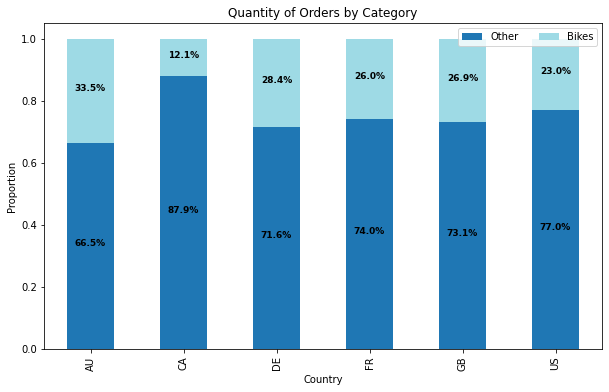

In [23]:
#visualizing quantity of bike sales across countries
fig = plt.figure() 
quant_perc.plot(kind='bar', 
              stacked=True, 
              colormap='tab20',
              figsize=(10, 6))

key=['Other','Bikes']
plt.legend(key, loc="best", ncol=2)
plt.xlabel("Country")
plt.ylabel("Proportion")
plt.title("Quantity of Orders by Category")

for n, x in enumerate([*quant.index.values]):
    for (proportion, y_loc) in zip(quant_perc.loc[x],
                                   quant_perc.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=9,
                 fontweight="bold")

plt.savefig('/content/drive/MyDrive/Colab Notebooks/MSSP-607/Assignments/Assignment2/BikeSales.pdf')
plt.show()

In [24]:
#comparing profits for bikes and non-bikes across countries
prof = pd.crosstab(
    index=df['CountryRegionCode'],
    columns=df['Bike'],
    values=df['Profit'],
    aggfunc=sum,
)

prof_perc = pd.crosstab(
    index=df['CountryRegionCode'],
    columns=df['Bike'],
    values=df['Profit'],
    aggfunc=sum,
    normalize = "index"
)

prof_perc
prof

Bike,False,True
CountryRegionCode,,
AU,113587.7857,3.572267e+06
CA,88470.2817,7.414512e+05
DE,46729.0170,1.140642e+06
FR,49529.1246,1.036736e+06
GB,59284.5855,1.331206e+06
US,217486.3499,3.683494e+06


<Figure size 432x288 with 0 Axes>

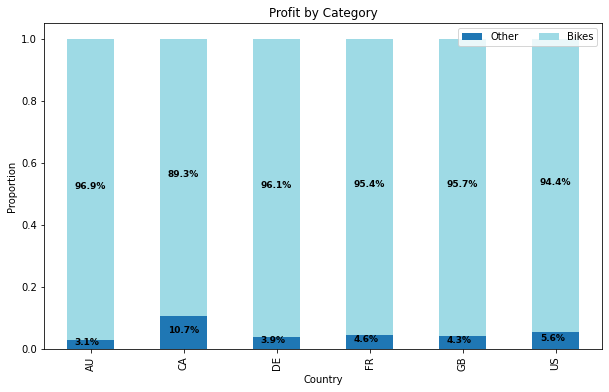

In [25]:
#visualizing bike profits across countries
fig = plt.figure() 
prof_perc.plot(kind='bar', 
              stacked=True, 
              colormap='tab20',
              figsize=(10, 6))

plt.legend(key, loc="best", ncol=2)
plt.xlabel("Country")
plt.ylabel("Proportion")
plt.title("Profit by Category")

for n, x in enumerate([*prof.index.values]):
    for (proportion, y_loc) in zip(prof_perc.loc[x],
                                   prof_perc.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=9,
                 fontweight="bold")

plt.savefig('/content/drive/MyDrive/Colab Notebooks/MSSP-607/Assignments/Assignment2/BikeProfit.pdf')
plt.show()